In [1]:
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3
import unicodedata

In [2]:
try:

    # Leer el archivo csv ubicado en la ruta específicada  y asigna los dayos a la variable df_resultados

    df_acumulado_saber_11 = pd.read_csv("C:/Users/USUARIO/OneDrive/Desktop/Análisis de Datos/Módulo Técnico/acumulado_saber_11.csv")

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente

    print("El dataset se cargó exitosamente")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código

except FileExistsError as e:

    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se puede encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código

except Exception as e:

    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error

    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente


In [3]:
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset

df_acumulado_saber_11 = pd.DataFrame(df_acumulado_saber_11)

# Consula y validación de la cantidad de filas y columnas del dataframe 

num_rows, num_cols = df_acumulado_saber_11.shape

# Imprimir mensaje y valores de salidas del dataframe

print(f"El DataFrame, tiene {num_rows} filas {num_cols} columnas.")

El DataFrame, tiene 1086317 filas 40 columnas.


In [4]:
# La función sample, devuelve la cantidad aleatoria de filas/registros solicitada del dataframe

df_acumulado_saber_11.sample(10)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,...,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_PRIVADO_LIBERTAD,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
547586,CC,COLOMBIA,F,11/23/1986 12:00:00 AM,20194,SB11201940235393,COLOMBIA,No,CASANARE,YOPAL,...,ACADÉMICO,URBANO,SABATINA,N,38,30,33,37,30.0,171
117111,TI,COLOMBIA,M,10/15/2002 12:00:00 AM,20194,SB11201940213512,COLOMBIA,No,VALLE,VIJES,...,TÉCNICO,RURAL,UNICA,N,52,42,35,46,52.0,222
582384,CE,VENEZUELA,M,07/19/2003 12:00:00 AM,20204,SB11202040493054,VENEZUELA,No,LA GUAJIRA,MAICAO,...,TÉCNICO,URBANO,MAÑANA,N,49,54,40,39,33.0,223
92538,TI,COLOMBIA,M,12/21/2002 12:00:00 AM,20194,SB11201940140230,COLOMBIA,No,BOLIVAR,MAHATES,...,ACADÉMICO,URBANO,MAÑANA,N,68,67,62,62,56.0,320
793836,TI,COLOMBIA,M,09/22/2002 12:00:00 AM,20204,SB11202040318840,COLOMBIA,No,NORTE SANTANDER,CÚCUTA,...,ACADÉMICO,URBANO,UNICA,N,48,53,53,36,52.0,239
473203,TI,COLOMBIA,F,09/01/2002 12:00:00 AM,20194,SB11201940143773,COLOMBIA,No,BOLIVAR,CLEMENCIA,...,TÉCNICO,URBANO,MAÑANA,N,52,41,40,31,45.0,207
1054551,TI,COLOMBIA,F,09/21/2003 12:00:00 AM,20204,SB11202040478229,COLOMBIA,No,ANTIOQUIA,MEDELLÍN,...,TÉCNICO/ACADÉMICO,URBANO,UNICA,N,49,21,34,43,39.0,185
446640,TI,COLOMBIA,F,04/24/2003 12:00:00 AM,20194,SB11201940422319,COLOMBIA,No,BOGOTÁ,BOGOTÁ D.C.,...,TÉCNICO/ACADÉMICO,URBANO,COMPLETA,N,50,56,50,42,54.0,249
836301,TI,COLOMBIA,F,06/12/2003 12:00:00 AM,20204,SB11202040055095,COLOMBIA,No,ANTIOQUIA,CAREPA,...,ACADÉMICO,URBANO,MAÑANA,N,47,47,46,40,34.0,221
592535,TI,COLOMBIA,F,06/04/2004 12:00:00 AM,20204,SB11202040102693,COLOMBIA,No,RISARALDA,PEREIRA,...,TÉCNICO/ACADÉMICO,URBANO,MAÑANA,N,58,65,53,60,58.0,295


In [5]:
df_acumulado_saber_11["ESTU_DEPTO_RESIDE"].value_counts()

ESTU_DEPTO_RESIDE
BOGOTÁ             164459
ANTIOQUIA          146584
VALLE               88016
CUNDINAMARCA        71566
ATLANTICO           62113
BOLIVAR             49838
SANTANDER           49742
CORDOBA             39570
NARIÑO              33438
TOLIMA              32349
BOYACA              32197
MAGDALENA           32086
NORTE SANTANDER     30653
CAUCA               28088
HUILA               26409
CESAR               26087
META                24381
SUCRE               21152
CALDAS              20881
RISARALDA           20395
LA GUAJIRA          16891
QUINDIO             12342
CASANARE            11564
CHOCO                9215
CAQUETA              8561
PUTUMAYO             7785
ARAUCA               6460
BOGOTA               5403
GUAVIARE             1834
AMAZONAS             1463
SAN ANDRES           1222
VICHADA              1015
VAUPES                675
GUAINIA               570
EXTRANJERO            154
-                      16
Name: count, dtype: int64

In [6]:
# La función info(columns), devuelve el nombre de las columnas del dataframe

df_acumulado_saber_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086317 entries, 0 to 1086316
Data columns (total 40 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ESTU_TIPODOCUMENTO            1086317 non-null  object 
 1   ESTU_NACIONALIDAD             1086317 non-null  object 
 2   ESTU_GENERO                   1086308 non-null  object 
 3   ESTU_FECHANACIMIENTO          1086315 non-null  object 
 4   PERIODO                       1086317 non-null  int64  
 5   ESTU_CONSECUTIVO              1086317 non-null  object 
 6   ESTU_PAIS_RESIDE              1086317 non-null  object 
 7   ESTU_TIENEETNIA               1082560 non-null  object 
 8   ESTU_DEPTO_RESIDE             1085174 non-null  object 
 9   ESTU_MCPIO_RESIDE             1085174 non-null  object 
 10  FAMI_ESTRATOVIVIENDA          1067781 non-null  object 
 11  FAMI_PERSONASHOGAR            1061274 non-null  object 
 12  FAMI_CUARTOSHOGAR           

In [7]:
# Obtener información general del conjunto de datos

df_acumulado_saber_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086317 entries, 0 to 1086316
Data columns (total 40 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ESTU_TIPODOCUMENTO            1086317 non-null  object 
 1   ESTU_NACIONALIDAD             1086317 non-null  object 
 2   ESTU_GENERO                   1086308 non-null  object 
 3   ESTU_FECHANACIMIENTO          1086315 non-null  object 
 4   PERIODO                       1086317 non-null  int64  
 5   ESTU_CONSECUTIVO              1086317 non-null  object 
 6   ESTU_PAIS_RESIDE              1086317 non-null  object 
 7   ESTU_TIENEETNIA               1082560 non-null  object 
 8   ESTU_DEPTO_RESIDE             1085174 non-null  object 
 9   ESTU_MCPIO_RESIDE             1085174 non-null  object 
 10  FAMI_ESTRATOVIVIENDA          1067781 non-null  object 
 11  FAMI_PERSONASHOGAR            1061274 non-null  object 
 12  FAMI_CUARTOSHOGAR           

In [8]:
# Descripción estadística de las variables numéricas

df_acumulado_saber_11.describe()

,PERIODO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,1.086317e+06,1.086317e+06,1.086317e+06,1.086317e+06,1.086317e+06,1.085928e+06,1.086317e+06
mean,2.019851e+04,5.238752e+01,5.102646e+01,4.848017e+01,4.746889e+01,4.817472e+01,2.485626e+02
std,5.469084e+00,1.047043e+01,1.198036e+01,1.081123e+01,1.224824e+01,1.254123e+01,5.107014e+01
min,2.018100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.019400e+04,4.500000e+01,4.200000e+01,4.000000e+01,3.800000e+01,3.900000e+01,2.100000e+02
50%,2.019400e+04,5.300000e+01,5.100000e+01,4.800000e+01,4.700000e+01,4.600000e+01,2.450000e+02
75%,2.020400e+04,6.000000e+01,5.900000e+01,5.600000e+01,5.600000e+01,5.500000e+01,2.840000e+02
max,2.020400e+04,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,5.000000e+02


In [9]:
# Descripción estadística de las variables numéricas sin notación científica

# Se configura la forma en que los números flotantes se muestran al imprimir un DataFrame en pandas-
# Se define función lambda que toma un número x y devuelve ese número formateado con 1 decimal.

pd.set_option("display.float_format", lambda x: "%.1f" % x)

df_acumulado_saber_11.describe()

,PERIODO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,1086317.0,1086317.0,1086317.0,1086317.0,1086317.0,1085928.0,1086317.0
mean,20198.5,52.4,51.0,48.5,47.5,48.2,248.6
std,5.5,10.5,12.0,10.8,12.2,12.5,51.1
min,20181.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,20194.0,45.0,42.0,40.0,38.0,39.0,210.0
50%,20194.0,53.0,51.0,48.0,47.0,46.0,245.0
75%,20204.0,60.0,59.0,56.0,56.0,55.0,284.0
max,20204.0,100.0,100.0,100.0,100.0,100.0,500.0


In [10]:
# Descripción de las variables categóricas

df_acumulado_saber_11.describe(include=["object"])

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,...,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_PRIVADO_LIBERTAD
count,1086317,1086317,1086308,1086315,1086317,1086317,1082560,1085174,1085174,1067781,...,1067532,1051705,1086317,1086317,1086317,1000695,1057464,1086317,1086317,1086317
unique,13,57,3,20993,1086317,57,3,36,1034,8,...,6,5,10313,3,2,3,5,2,6,2
top,TI,COLOMBIA,F,01/01/1900 12:00:00 AM,SB11201810007354,COLOMBIA,No,BOGOTÁ,BOGOTÁ D.C.,Estrato 2,...,0,No,INSTITUCION EDUCATIVA FRANCISCO JOSE DE CALDAS,MIXTO,OFICIAL,N,ACADÉMICO,URBANO,MAÑANA,N
freq,886061,1081623,589970,1839,1,1081623,1010036,164459,169862,376285,...,672318,726749,2057,1049017,808491,892455,570630,913555,468577,1086029


In [11]:
# Identificar valores únicos por columna

print("\nValores únicos por columna:")
for column in df_acumulado_saber_11.columns:
    unique_values = df_acumulado_saber_11[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos): \n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("...")


Valores únicos por columna:

ESTU_TIPODOCUMENTO (13 valores únicos): 
['CC' 'TI' 'CR' 'CE' 'PE' 'PC' 'RC' 'PEP' 'NES' 'CCB']
...

ESTU_NACIONALIDAD (57 valores únicos): 
['COLOMBIA' 'ESTADOS UNIDOS' 'BRASIL' 'PANAMÁ' 'VENEZUELA' 'ECUADOR'
 'NICARAGUA' 'ESPAÑA' 'ARGENTINA' 'MÉXICO']
...

ESTU_GENERO (4 valores únicos): 
['F' 'M' '-' nan]

ESTU_FECHANACIMIENTO (20994 valores únicos): 
['29/09/1999' '19/03/2001' '31/07/2000' '20/01/2002' '23/10/2001'
 '20/04/2001' '05/04/2000' '05/11/2001' '03/11/2000' '23/09/1999']
...

PERIODO (4 valores únicos): 
[20181 20194 20201 20204]

ESTU_CONSECUTIVO (1086317 valores únicos): 
['SB11201810007354' 'SB11201810018765' 'SB11201810028523'
 'SB11201810003574' 'SB11201810024346' 'SB11201810006862'
 'SB11201810017023' 'SB11201810048390' 'SB11201810010098'
 'SB11201810012063']
...

ESTU_PAIS_RESIDE (57 valores únicos): 
['COLOMBIA' 'ESTADOS UNIDOS' 'BRASIL' 'PANAMÁ' 'VENEZUELA' 'ECUADOR'
 'NICARAGUA' 'ESPAÑA' 'ARGENTINA' 'MÉXICO']
...

ESTU_TIENEETNIA (4

<function matplotlib.pyplot.show(close=None, block=None)>

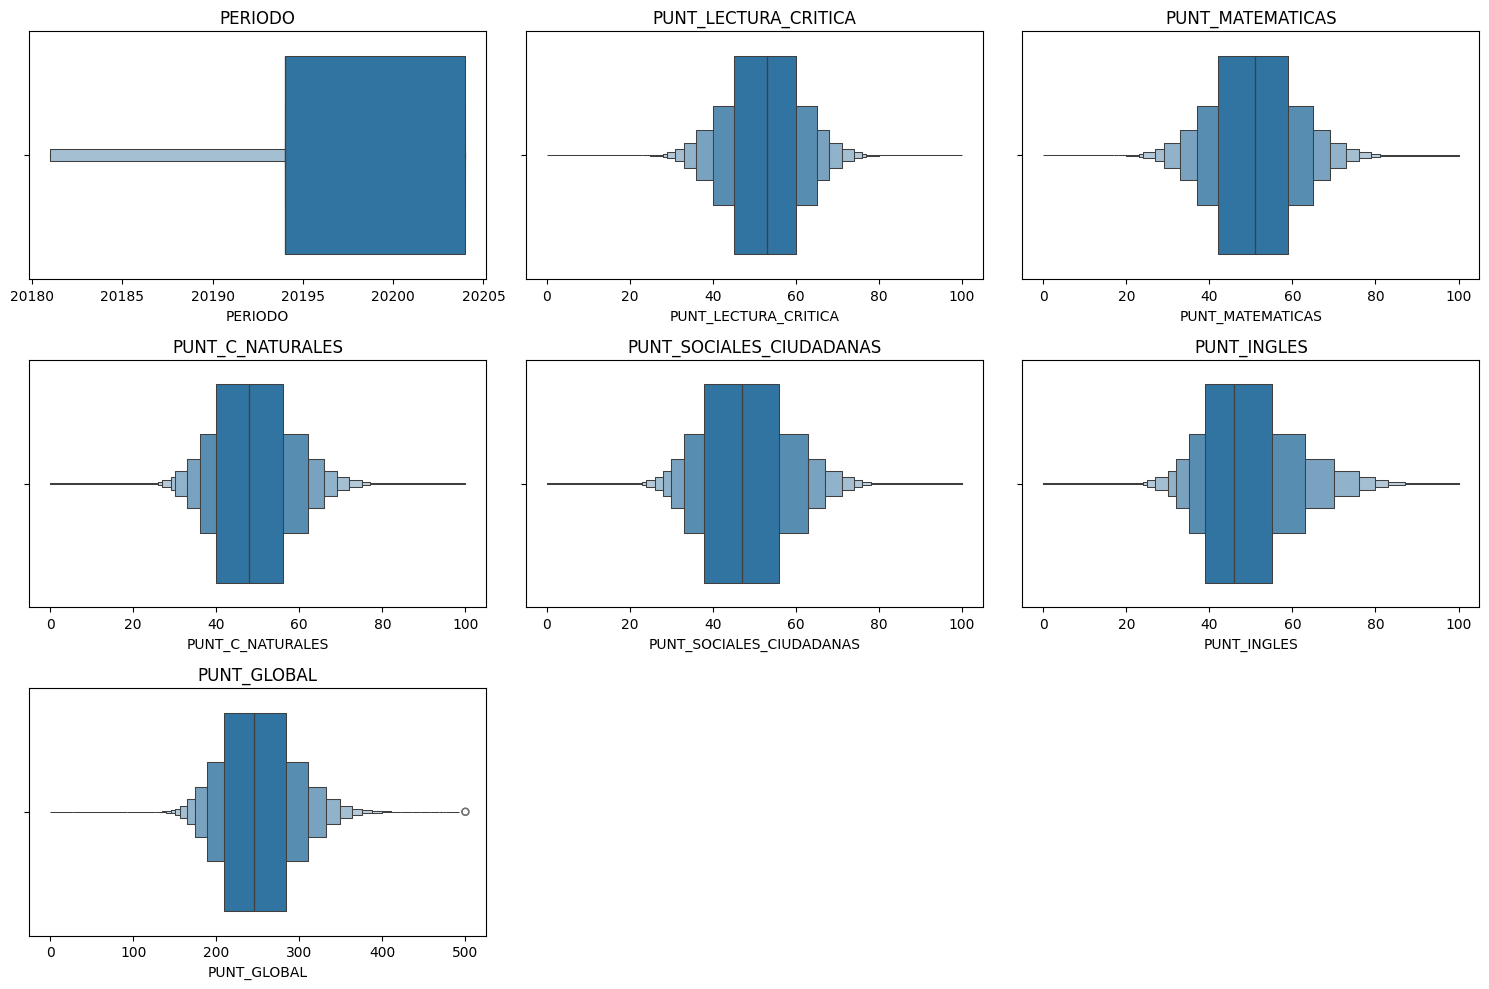

In [12]:
numeric_cols = df_acumulado_saber_11.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.boxenplot(data=df_acumulado_saber_11, x=col)
    plt.title(col)

plt.tight_layout()
plt.show

In [13]:
# Análisis de valores faltantes por columna

datos_faltantes = df_acumulado_saber_11.isnull().sum()
porcentaje_faltas = (datos_faltantes / len(df_acumulado_saber_11)) * 100

faltantes_df = pd.DataFrame({
    "Valores Faltantes": datos_faltantes,
    "Porcentaje (%)": porcentaje_faltas
})

# Ordenar de manera descendente por %%!

faltantes_df = faltantes_df.sort_values(by="Porcentaje (%)", ascending=False)
faltantes_df

,Valores Faltantes,Porcentaje (%)
COLE_BILINGUE,85622,7.9
ESTU_DEDICACIONINTERNET,46477,4.3
FAMI_EDUCACIONMADRE,35989,3.3
ESTU_TIPOREMUNERACION,34612,3.2
FAMI_TIENECOMPUTADOR,29801,2.7
FAMI_TRABAJOLABORPADRE,29278,2.7
COLE_CARACTER,28853,2.7
FAMI_TIENECONSOLAVIDEOJUEGOS,26654,2.5
FAMI_TRABAJOLABORMADRE,26528,2.4
FAMI_SITUACIONECONOMICA,26023,2.4


In [14]:
# LIMPIEZA DE DATOS

# Identificar columnas con valores faltantes y decidir cómo manejarlos (eliminar, imputar, etc).

# Obtener valores únicos y su frecuencia en la columna "ESTU_TIPODOCUMENTO"

df_acumulado_saber_11["ESTU_TIPODOCUMENTO"].value_counts()



ESTU_TIPODOCUMENTO
TI      886061
CC      183034
CR       11470
CE        2527
NES       2288
PEP        680
PE         200
RC          33
PC          15
CCB          4
V            2
NUIP         2
NIP          1
Name: count, dtype: int64

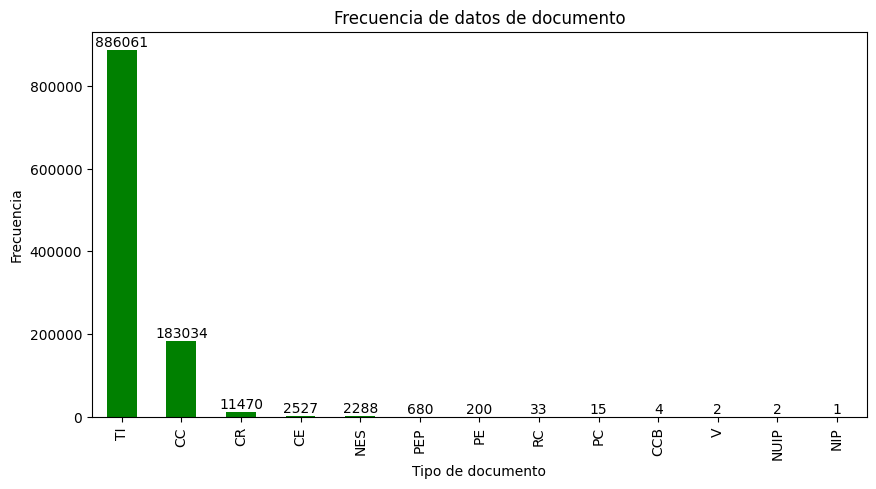

In [15]:
# Columna ESTU_TIPODOCUMENTO

# Obtener valores únicos y su frecuencia en la columna "ESTU_TIPODOCUMENTO"
tipo_documento_counts = df_acumulado_saber_11["ESTU_TIPODOCUMENTO"].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10,5))
ax = tipo_documento_counts.plot(kind="bar", color = "green")

# Añadir la cantidad en cada barra
for i, v in enumerate(tipo_documento_counts):
    ax.text(i, v + 1000, str(v), ha="center", va="bottom", fontsize=10)

# Titulos y etiquetas
plt.title("Frecuencia de datos de documento")
plt.xlabel("Tipo de documento")
plt.ylabel("Frecuencia")

# Mostrar gráfica
plt.show()

In [16]:
# Columna ESTU_NACIONALIDAD

# Obtener valores únicos y su frecuencia en la columna "ESTU_NACIONALIDAD"

df_acumulado_saber_11["ESTU_NACIONALIDAD"].value_counts()

ESTU_NACIONALIDAD
COLOMBIA                           1081623
VENEZUELA                             4108
ESTADOS UNIDOS                         149
ESPAÑA                                  92
ECUADOR                                 79
ARGENTINA                               21
BRASIL                                  20
MÉXICO                                  20
PERÚ                                    17
CUBA                                    16
CHILE                                   14
COSTA RICA                              13
ITALIA                                  11
PANAMÁ                                   9
FRANCIA                                  9
ALEMANIA                                 9
BOLIVIA                                  8
VANUATU                                  8
REPÚBLICA DOMINICANA                     7
EL SALVADOR                              7
HONDURAS                                 6
NICARAGUA                                5
PAÍSES BAJOS - HOLANDA              

In [17]:
# Hay registros con caracteres especiales (tildes) en el nombre.
# Reto a realizar: Eliminar (únicamente) las tildes de los registros

# Función para eliminar las tildes: 
def eliminar_tildes(texto):
    return "".join(
        c for c in unicodedata.normalize("NFD", texto)
        if unicodedata.category(c) != "Mn"
    )

df_acumulado_saber_11["ESTU_NACIONALIDAD"] = df_acumulado_saber_11["ESTU_NACIONALIDAD"].apply(eliminar_tildes)

df_acumulado_saber_11["ESTU_NACIONALIDAD"].value_counts()

ESTU_NACIONALIDAD
COLOMBIA                           1081623
VENEZUELA                             4108
ESTADOS UNIDOS                         149
ESPANA                                  92
ECUADOR                                 79
ARGENTINA                               21
BRASIL                                  20
MEXICO                                  20
PERU                                    17
CUBA                                    16
CHILE                                   14
COSTA RICA                              13
ITALIA                                  11
PANAMA                                   9
FRANCIA                                  9
ALEMANIA                                 9
BOLIVIA                                  8
VANUATU                                  8
REPUBLICA DOMINICANA                     7
EL SALVADOR                              7
HONDURAS                                 6
NICARAGUA                                5
PAISES BAJOS - HOLANDA              

In [18]:
# Columna ESTU_GENERO

# Obtener valores únicos y su frecuencia en la columna "ESTU_GENERO"
df_acumulado_saber_11["ESTU_GENERO"].value_counts()

ESTU_GENERO
F    589970
M    496216
-       122
Name: count, dtype: int64

In [19]:
# Los valores etiquetamos como "-", representan un 0.001% del total de registros, estos están representados con el caracter "-".
# Se procederá a reemplazar en el DataFrame original ese caracter con la etiqueta de "No registrado".

# Reemplazar los valores "-"
df_acumulado_saber_11["ESTU_GENERO"] = df_acumulado_saber_11["ESTU_GENERO"].replace("-", "No_Informa")

# Contar registros de la columna ESTU_GENERO

df_acumulado_saber_11["ESTU_GENERO"].value_counts()

ESTU_GENERO
F             589970
M             496216
No_Informa       122
Name: count, dtype: int64

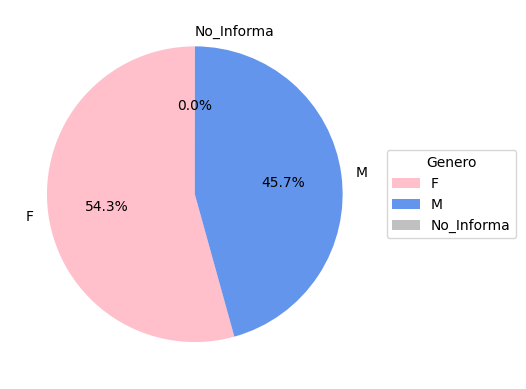

In [20]:
# Cantidad de registros por el tipo de género

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_genero = df_acumulado_saber_11["ESTU_GENERO"].value_counts()

# Establecer etiquetas y colores

etiquetas = ["F", "M", "No_Informa"]
colores = ["#FFC0CB", "#6495ED", "#C0C0C0"]

# Crear gráfico de torta
plt.pie(df_genero, labels=etiquetas, colors=colores, autopct="%1.1f%%", startangle=90)

# Agregar leyenda 
plt.legend(title="Genero", loc="center left", bbox_to_anchor=(1.0,0.5))

# Mostrar gráfico
plt.show()

In [21]:
# Columna ESTU_FECHANACIMIENTO

# Contar registros de la columna "ESTU_FECHANACIMIENTO"

df_acumulado_saber_11["ESTU_FECHANACIMIENTO"].value_counts().sort_values(ascending=False)

ESTU_FECHANACIMIENTO
01/01/1900 12:00:00 AM     1839
03/03/2003 12:00:00 AM     1297
01/03/2003 12:00:00 AM     1273
09/13/2002 12:00:00 AM     1259
09/17/2002 12:00:00 AM     1240
                           ... 
0002-04-20T00:00:00.000       1
06/03/1986 12:00:00 AM        1
0004-05-20T00:00:00.000       1
0002-06-20T00:00:00.000       1
01/19/1971 12:00:00 AM        1
Name: count, Length: 20993, dtype: int64

In [22]:
# Es posible que lleguemos a evidenciar un error "OutOfBoundsDatetime: Out of bounds nanosecond timestamp" cuano ejecutemos el cambio de tipo de dato, indica que en la columna
# de fechas se encuentran valores que no se pueden representar correctamente como objetos de fecha y hora de pandas.

# Para solucionar ese error, debemos identificar los valores problemáticos y limpiarlos antes de convertir la columna al formato de fecha y hora de pandas.
# Una forma de hacerlo es mediante la función "to_datetime()" de pandas, pasando el argumento "errors='coerce'". De esta forma, cualquier valor que no pueda convertirse
# correctamente será reemplazado por "NaT" (valores faltantes en pandas).

# Limpiar valores problemáticos

df_acumulado_saber_11["ESTU_FECHANACIMIENTO"] = df_acumulado_saber_11["ESTU_FECHANACIMIENTO"].str.replace("\r", "")
df_acumulado_saber_11["ESTU_FECHANACIMIENTO"] = df_acumulado_saber_11["ESTU_FECHANACIMIENTO"].str.replace("\n", "")

# Convertir columna ESTU_FECHANACIMIENTO al formato de fecha y hora de pandas
df_acumulado_saber_11["ESTU_FECHANACIMIENTO"] = pd.to_datetime(df_acumulado_saber_11["ESTU_FECHANACIMIENTO"], errors="coerce")

# Obtener solo el año de nacimiento
df_acumulado_saber_11["ANIO_NACIMIENTO"] = df_acumulado_saber_11["ESTU_FECHANACIMIENTO"].dt.year

# Si deseamos, tenemos la opción de eliminar o no columnas innecesarias, en este caso la columna "ESTU_FECHANACIMIENTO" será reemplazada por "ANIO_NACIMIENTO"

df_acumulado_saber_11 = df_acumulado_saber_11.drop("ESTU_FECHANACIMIENTO", axis=1)

# Mostrar resultados

df_acumulado_saber_11.head(3)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_84\3265065784.py:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_acumulado_saber_11["ESTU_FECHANACIMIENTO"] = pd.to_datetime(df_acumulado_saber_11["ESTU_FECHANACIMIENTO"], errors="coerce")


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,...,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_PRIVADO_LIBERTAD,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ANIO_NACIMIENTO
0,CC,COLOMBIA,F,20181,SB11201810007354,COLOMBIA,No,BOGOTA,BOGOTÁ D.C.,Estrato 6,...,URBANO,COMPLETA,N,71,65,69,63,90.0,344,1999.0
1,TI,COLOMBIA,M,20181,SB11201810018765,COLOMBIA,No,VALLE,CALI,Estrato 5,...,URBANO,COMPLETA,N,75,77,100,81,86.0,417,2001.0
2,TI,COLOMBIA,M,20181,SB11201810028523,COLOMBIA,No,VALLE,CALI,Estrato 1,...,RURAL,SABATINA,N,42,27,29,36,29.0,166,2000.0


In [23]:
df_acumulado_saber_11["ANIO_NACIMIENTO"].value_counts().sort_values(ascending=False)


ANIO_NACIMIENTO
2000.0    6865
2001.0    5639
1999.0    3448
1998.0     914
2002.0     864
          ... 
1955.0       2
1942.0       1
1949.0       1
1944.0       1
1953.0       1
Name: count, Length: 62, dtype: int64

In [24]:
# Contar registros de la columna "ANIO_NACIMIENTO"

conteo_por_anio = df_acumulado_saber_11["ANIO_NACIMIENTO"].value_counts()

# filtrar años de interés, entre 2009 y 2020

filtro = (conteo_por_anio.index >= 2009) & (conteo_por_anio.index <= 2020)
conteo_por_anio_filtrado = conteo_por_anio.loc[filtro]

# Mostrar resultados
print(conteo_por_anio_filtrado)
plt.show()

print("Entre los años 2009 y 2020, hay un total de:", conteo_por_anio_filtrado.sum())

ANIO_NACIMIENTO
2017.0    21
2009.0     7
2011.0     4
2010.0     4
2012.0     2
Name: count, dtype: int64
Entre los años 2009 y 2020, hay un total de: 38


In [25]:
# Identificar los índices de los registros a eliminar

indices_eliminar = df_acumulado_saber_11[(df_acumulado_saber_11["ANIO_NACIMIENTO"] >= 2009) & (df_acumulado_saber_11["ANIO_NACIMIENTO"] <= 2009)].index

# Eliminar los registros

df_resiltados = df_acumulado_saber_11.drop(indices_eliminar)

print("Se eliminaron", conteo_por_anio_filtrado.sum(), "registros que pertenecen a los nacidos entre 2009 y 2020")

Se eliminaron 38 registros que pertenecen a los nacidos entre 2009 y 2020


In [26]:
# Conteo de registros con NaN, null o vacíos en la columna "ANIO_NACIMIENTO"
df_acumulado_saber_11["ANIO_NACIMIENTO"].isna().sum()

1066521

In [27]:
# Calcular el número de registros con valores vacíos en ANIO_NACIMIENTO por grupo
vacios_por_grupo = df_acumulado_saber_11.groupby("ESTU_TIPODOCUMENTO")["ANIO_NACIMIENTO"].apply(lambda x: x.isna().sum())

# Ordenar de mayor a menor
vacios_grupo_sorted = vacios_por_grupo.sort_values(ascending=False)

# Imprimir cantidad de valores vacíos ordenados de mayor a menor
for grupo in vacios_grupo_sorted.index:
    print(f"Grupo: {grupo}")
    print(f"Cantidad de valores vacíos: {vacios_grupo_sorted.loc[grupo]}")
    print ("--------------------------------------")

Grupo: TI
Cantidad de valores vacíos: 871802
--------------------------------------
Grupo: CC
Cantidad de valores vacíos: 178022
--------------------------------------
Grupo: CR
Cantidad de valores vacíos: 11108
--------------------------------------
Grupo: CE
Cantidad de valores vacíos: 2402
--------------------------------------
Grupo: NES
Cantidad de valores vacíos: 2288
--------------------------------------
Grupo: PEP
Cantidad de valores vacíos: 680
--------------------------------------
Grupo: PE
Cantidad de valores vacíos: 168
--------------------------------------
Grupo: RC
Cantidad de valores vacíos: 32
--------------------------------------
Grupo: PC
Cantidad de valores vacíos: 10
--------------------------------------
Grupo: CCB
Cantidad de valores vacíos: 4
--------------------------------------
Grupo: NUIP
Cantidad de valores vacíos: 2
--------------------------------------
Grupo: V
Cantidad de valores vacíos: 2
--------------------------------------
Grupo: NIP
Cantidad de

In [28]:
# Calcular el número total de valores no nulos en ANIO_NACIMIENTO
total_no_nulos = df_acumulado_saber_11["ANIO_NACIMIENTO"].notna().sum()

# Calcular el número de registros con valores no nulos en ANIO_NACIMIENTO por grupo
no_nulos_por_grupo = df_acumulado_saber_11.groupby("ESTU_TIPODOCUMENTO")["ANIO_NACIMIENTO"].apply(lambda x: x.notna().sum())

# Calcular el porcentaje de cada grupo respecto al total de valores no nulos
porcentaje_por_grupo = (no_nulos_por_grupo / total_no_nulos)*100

# Ordenar de mayor a menor
porcentaje_por_grupo_sorted = porcentaje_por_grupo.sort_values(ascending=False)

# Imprimir procentaje de valores no nulos y cantidad por grupo
for grupo in porcentaje_por_grupo_sorted.index:
    print(f"Grupo: {grupo}")
    print(f"Cantidad de valores no nulos: {no_nulos_por_grupo.loc[grupo]}")
    print(f"Porcentajes sobre el total de valores no nulos: {porcentaje_por_grupo_sorted.loc[grupo]:.2f}%")
    print("--------------------------------")

Grupo: TI
Cantidad de valores no nulos: 14259
Porcentajes sobre el total de valores no nulos: 72.03%
--------------------------------
Grupo: CC
Cantidad de valores no nulos: 5012
Porcentajes sobre el total de valores no nulos: 25.32%
--------------------------------
Grupo: CR
Cantidad de valores no nulos: 362
Porcentajes sobre el total de valores no nulos: 1.83%
--------------------------------
Grupo: CE
Cantidad de valores no nulos: 125
Porcentajes sobre el total de valores no nulos: 0.63%
--------------------------------
Grupo: PE
Cantidad de valores no nulos: 32
Porcentajes sobre el total de valores no nulos: 0.16%
--------------------------------
Grupo: PC
Cantidad de valores no nulos: 5
Porcentajes sobre el total de valores no nulos: 0.03%
--------------------------------
Grupo: RC
Cantidad de valores no nulos: 1
Porcentajes sobre el total de valores no nulos: 0.01%
--------------------------------
Grupo: CCB
Cantidad de valores no nulos: 0
Porcentajes sobre el total de valores no

In [29]:
# Filtro para registros donde ESTU_TIPODOCUMENTO es igual a "TI" y ANIO_NACIMIENTO es NaN
filtro_ti = (df_acumulado_saber_11["ESTU_TIPODOCUMENTO"] == "TI") & (df_acumulado_saber_11["ANIO_NACIMIENTO"].isna())

# Numero de registros a asignar
num_registro_ti = filtro_ti.sum()

# Distribución de asignación ajustada
distribución = {
    2003: 0.5,
    2004: 0.5,
    2005: 0.3,
    2006: 0.2,
    2007: 0.2,
    2008: 0.2
}

#Ajustar las probabilidades para que sumen 1
total_probabilidad = sum(distribución.values())
probabilidad_ajustadas = {key: value / total_probabilidad for key, value in distribución.items()}

# Generar una lista de años basada en la distribución ajustada
anos_distribucion = np.random.choice(list(probabilidad_ajustadas.keys()), size=num_registro_ti, p=list(probabilidad_ajustadas.values()))

# Asignar los años a los registros filtrados
df_acumulado_saber_11.loc[filtro_ti, "ANIO_NACIMIENTO"] = anos_distribucion

# Verificar los cambios
print(df_acumulado_saber_11.loc[filtro_ti, "ANIO_NACIMIENTO"].value_counts())

ANIO_NACIMIENTO
2003.0    229311
2004.0    229226
2005.0    137501
2008.0     92116
2006.0     91868
2007.0     91780
Name: count, dtype: int64
